<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-2-b3fdaf15785b>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


## Task 1: Become familiar with the dataset

| Variable    | Description                                                         |                                                      
| ----------- | ------------------------------------------------------------------- |
| CRIM        | Per capita crime rate by town                                       |
| ZN          | Proportion of residential land zoned for lots over 25000 sq.ft      |
| INDUS       | Proportion of non-retail business acres per town                    |
| CHAS        | Charles River dummy variable (1 if tract bounds river; 0 otherwise) |
| NOX         | Nitric oxides concentration (parts per 10 million)                  |
| RM          | Average number of rooms per dwelling                                |
| AGE         | Proportion of owner-occupied units built prior to 1940              |
| DIS         | Weighted distances to five Boston employment centers                |
| RAD         | Index of accessibility to radial highways                           |
| TAX         | Full-value property-tax rate per $10000                             |
| PTRATIO     | Pupil-teacher ratio by town                                         |
| LSTAT       | % lower status of the population                                    |
| MEDV        | Median value of owner-occupied homes in $1000's                     |

In [5]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [6]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.4 KB


In [7]:
boston_df.shape

(506, 14)

## Task 2: Generate Descriptive Statistics and Visualizations

For the "Median value of owner-occupied homes" provide a boxplot

[Text(0, 0.5, "Median value of owner-occupied homes in $1000's"),
 Text(0.5, 0, 'Boxplot'),
 Text(0.5, 1.0, 'Boxplot for Median Value of owner-occupied Homes')]

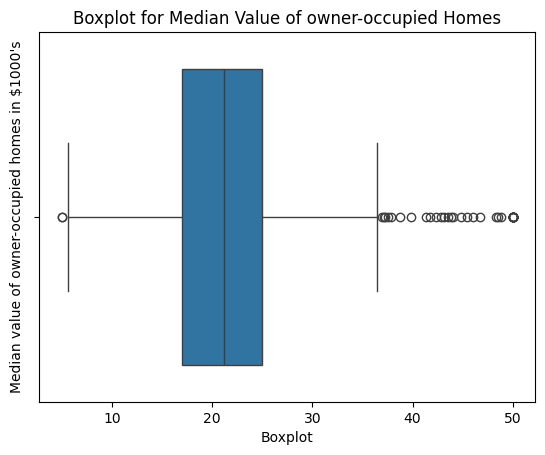

In [8]:
ax1 = sns.boxplot(x='MEDV', data=boston_df)
ax1.set(ylabel = "Median value of owner-occupied homes in $1000's"
        , xlabel = "Boxplot"
        , title = "Boxplot for Median Value of owner-occupied Homes")

Provide a  bar plot for the Charles river variable

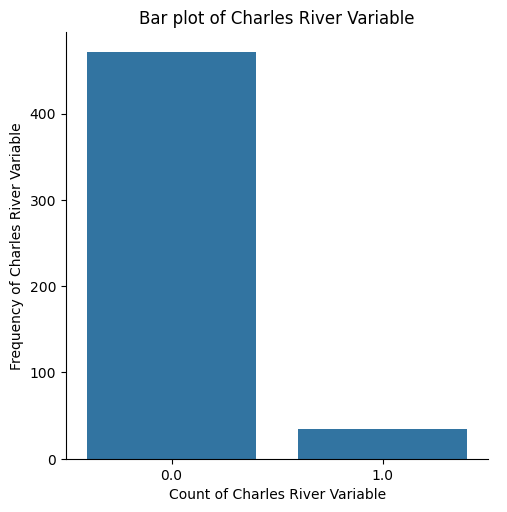

In [9]:
ax2 = sns.catplot(x='CHAS', kind='count', data=boston_df)
ax2.set(ylabel = "Frequency of Charles River Variable"
        , xlabel = "Count of Charles River Variable"
        , title = "Bar plot of Charles River Variable")

Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

[Text(0.5, 0, 'Proportion of owner-occupied units built prior to 1940'),
 Text(0, 0.5, "Median value of owner-occupied homes in $1000's"),
 Text(0.5, 1.0, 'Boxplot for the MEDV variable vs the AGE variable.')]

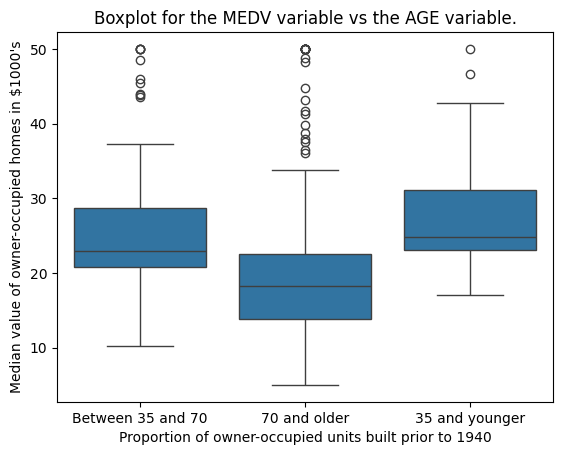

In [10]:
boston_df.loc[boston_df['AGE'] <= 30, 'Age_Group'] = "35 and younger"
boston_df.loc[(boston_df['AGE'] > 30) & (boston_df['AGE'] < 70), 'Age_Group'] = "Between 35 and 70"
boston_df.loc[(boston_df['AGE'] >= 70), 'Age_Group'] = "70 and older"
ax3 = sns.boxplot(x = 'Age_Group', y = 'MEDV', data = boston_df)
ax3.set(xlabel = "Proportion of owner-occupied units built prior to 1940"
           , ylabel = "Median value of owner-occupied homes in $1000's"
           , title = "Boxplot for the MEDV variable vs the AGE variable.")

Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

[Text(0.5, 0, 'Nitric oxides concentration (parts per 10 million)'),
 Text(0, 0.5, 'Proportion of non-retail business acres per town '),
 Text(0.5, 1.0, 'Scatter Plot for the NOX variable vs the INDUS variable.')]

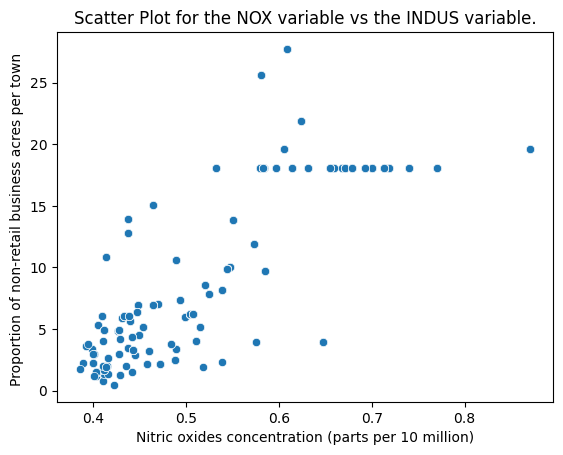

In [11]:
ax4 = sns.scatterplot(x='NOX', y='INDUS', data=boston_df)
ax4.set(xlabel = "Nitric oxides concentration (parts per 10 million)"
           , ylabel = "Proportion of non-retail business acres per town "
           , title = "Scatter Plot for the NOX variable vs the INDUS variable.")

There is a positive correlation between NOX and INDUS variables and a linear relationship between these variables. 

Create a histogram for the pupil to teacher ratio variable

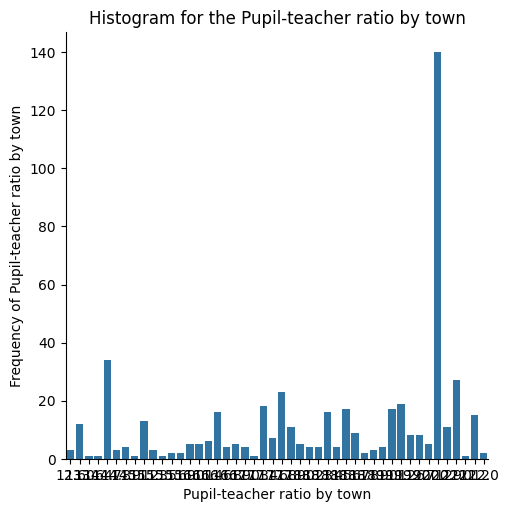

In [12]:
ax5 = sns.catplot(x='PTRATIO', kind='count', data=boston_df)
ax5.set(xlabel = "Pupil-teacher ratio by town"
           , ylabel = "Frequency of Pupil-teacher ratio by town"
           , title = "Histogram for the Pupil-teacher ratio by town")

## Task 3: Use the appropriate tests to answer the questions provided.

Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

**Hypothesis:**

**Null Hypothesis:** There is no important difference in median value of houses bounded by the Charles River

**Alternative Hypothesis:** There is an important difference in median value of houses bounded by the Charles River

In [15]:
scipy.stats.levene(boston_df[boston_df['CHAS'] == 0]['MEDV'], 
                   boston_df[boston_df['CHAS'] == 1]['MEDV'], center='mean')

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

In [17]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0]['MEDV'], 
                      boston_df[boston_df['CHAS'] == 1]['MEDV'], equal_var = False)

TtestResult(statistic=-3.113291312794837, pvalue=0.003567170098137517, df=36.876408797611994)

**Conclusion:** If p value is less than 0.05, we reject the hypothesis that shows there is an statistical difference between houses in the Charles River. 

Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

**Hypothesis:**

**Null Hypothesis:** There is no important difference in median value of houses for each proportion of owner occupied units built before 1940

**Alternative Hypothesis:** There is an important difference in median value of houses for each proportion of owner occupied units built before 1940

In [19]:
from statsmodels.formula.api import ols
lm = ols('MEDV ~ AGE', data = boston_df).fit()
table= sm.stats.anova_lm(lm)
print(table)

             df        sum_sq      mean_sq          F        PR(>F)
AGE         1.0   6069.761065  6069.761065  83.477459  1.569982e-18
Residual  504.0  36646.534350    72.711378        NaN           NaN


**Conclusion:** If p value is less than 0.05, we reject the hypothesis that shows there is an statistical difference in median value of houses for each proportion of owner occupied units built before 1940.

Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

**Hypothesis:**

**Null Hypothesis:** There is no important correlation between Nitric oxide concentrations and proportion of non-retail business acres per town

**Alternative Hypothesis:** There is an important correlation between Nitric oxide concentrations and proportion of non-retail business acres per town

In [24]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

**Conclusion:** If pearson correlation is 0.76, and p value is less than 0.05, we reject the hypothesis that shows there is a positive correlation between Nitric oxide concentrations and proportion of non-retail business acres per town.

What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

**Hypothesis:**

**Null Hypothesis:** There is no important difference in an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes

**Alternative Hypothesis:** There is an important difference in an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes

In [25]:
X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X) 
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 17 Jun 2025   Prob (F-statistic):           1.21e-08
Time:                        18:33:56   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Conclusion:** If p value is less than 0.05, we reject the hypothesis that shows there is a difference in an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes